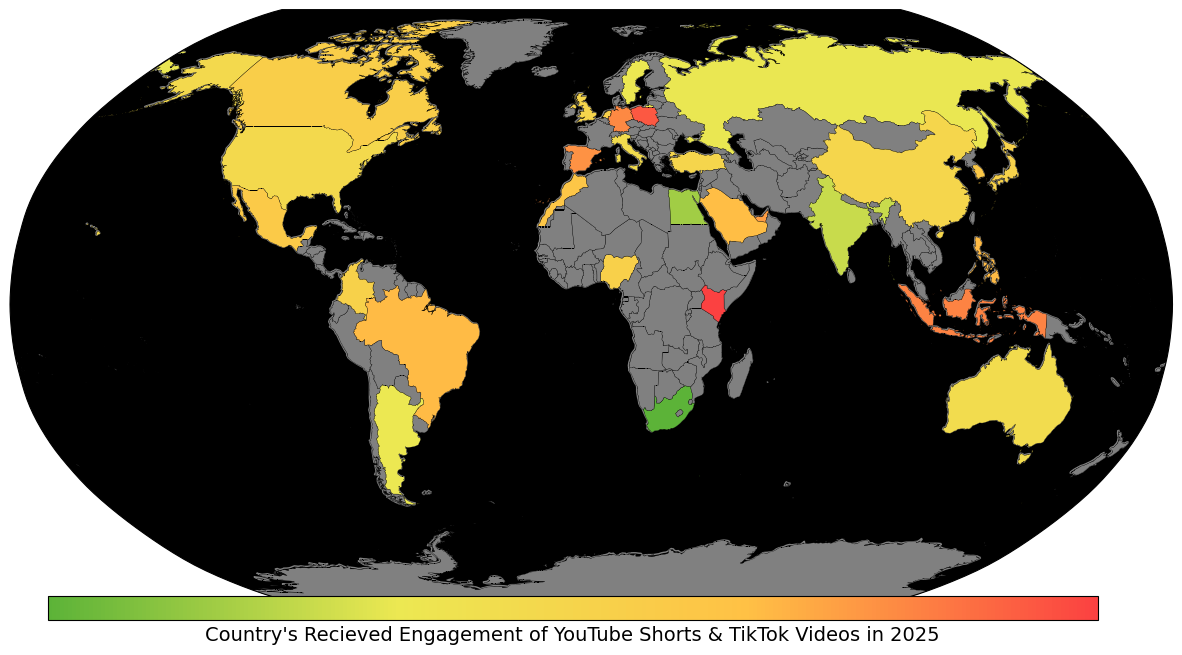

In [46]:
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cartopy.io.shapereader as shpreader
from matplotlib.patheffects import withStroke

totals = {}
with open("/Users/sdank/Downloads/youtube_shorts_tiktok_trends_2025.csv", 'r', encoding='utf-8') as f:
    for row in csv.DictReader(f):
        iso = row["country"].upper()
        totals[iso] = totals.get(iso, 0) + float(row["engagement_total"])

colors = ["#5CB338", "#ECE852", "#FFC145", "#FB4141"]

gradient = mcolors.LinearSegmentedColormap.from_list(
    "engagement_range", colors
)

if totals:
    low, high = min(totals.values()), max(totals.values())
else:
    low, high = 0, 1
norm = mcolors.Normalize(vmin=low, vmax=high)

shape_path = shpreader.natural_earth("50m", "cultural", "admin_0_countries")
countries = list(shpreader.Reader(shape_path).records())

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.set_facecolor("black")
ax.coastlines(color="gray")

ax.add_feature(
    cfeature.NaturalEarthFeature(
        "cultural",
        "admin_0_boundary_lines_land",
        "50m",
        facecolor="none"
    ),
    edgecolor="white",
    linewidth=0.3
)

for rec in countries:
    iso = rec.attributes.get("ISO_A2", "").upper()
    val = totals.get(iso)
    color = gradient(norm(val)) if val is not None else "#808080"
    ax.add_geometries(
        [rec.geometry],
        crs=ccrs.PlateCarree(),
        facecolor=color,
        edgecolor="black",
        linewidth=0.2
    )

cax = fig.add_axes([0.15, 0.1, 0.7, 0.03])
sm = plt.cm.ScalarMappable(norm=norm, cmap=gradient)
bar = plt.colorbar(sm, cax=cax, orientation="horizontal")

bar.set_ticks([])
bar.ax.tick_params(length=0)

bar.set_label(
    "Country's Recieved Engagement of YouTube Shorts & TikTok Videos in 2025",
    color="black", fontsize=14
)
plt.show()